In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report


In [26]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.head())


(8693, 14)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4       

In [27]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [28]:
df.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

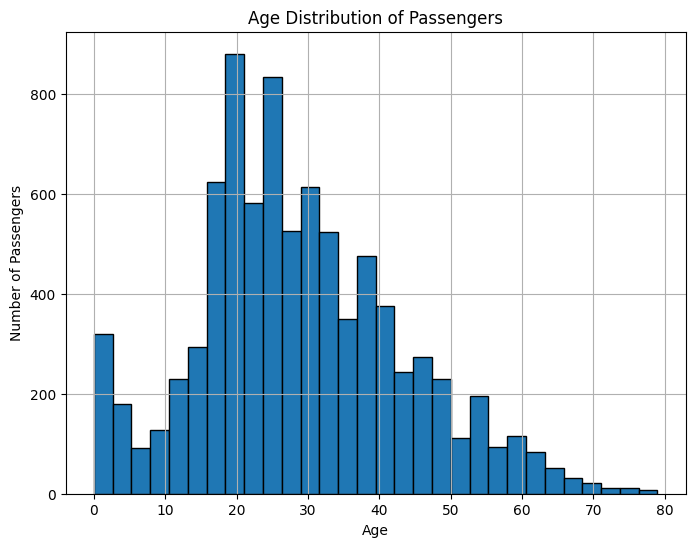

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')  # Remove NaN for the histogram
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

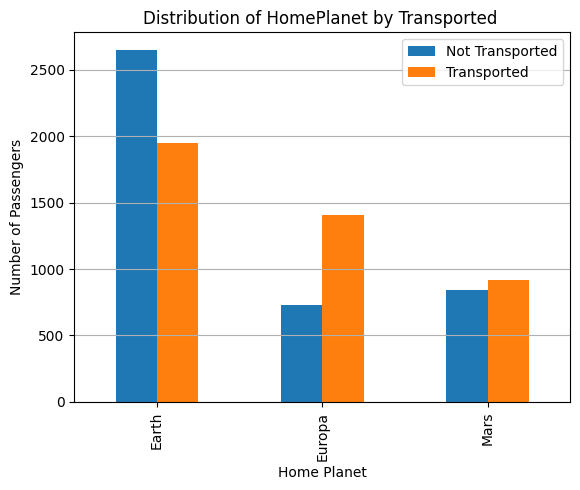

In [33]:
homeplanet_transported = df.groupby(['HomePlanet', 'Transported']).size().unstack()
homeplanet_transported.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Distribution of HomePlanet by Transported ')
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')
plt.legend(['Not Transported', 'Transported'])
plt.grid(True, axis='y')
plt.show()

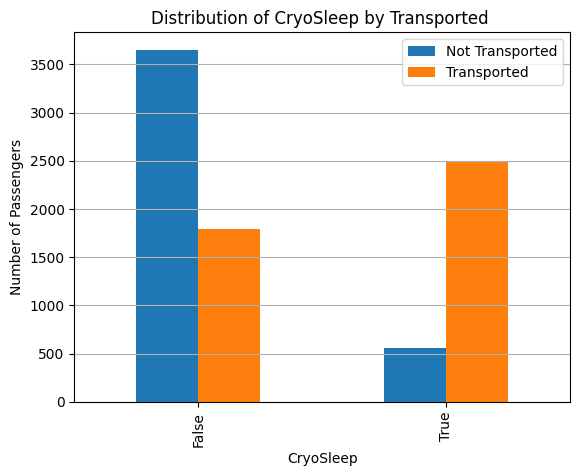

In [35]:
cryosleep_transported = df.groupby(['CryoSleep', 'Transported']).size().unstack()
cryosleep_transported.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Distribution of CryoSleep by Transported ')
plt.xlabel('CryoSleep')
plt.ylabel('Number of Passengers')
plt.legend(['Not Transported', 'Transported'])
plt.grid(True, axis='y')
plt.show()

/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2957449228.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Non', 'Oui'])
/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2957449228.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Non', 'Oui'])
/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2957449228.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Non', 'Oui'])
/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2957449228.py:8: MatplotlibDeprecationWarning: The 'l

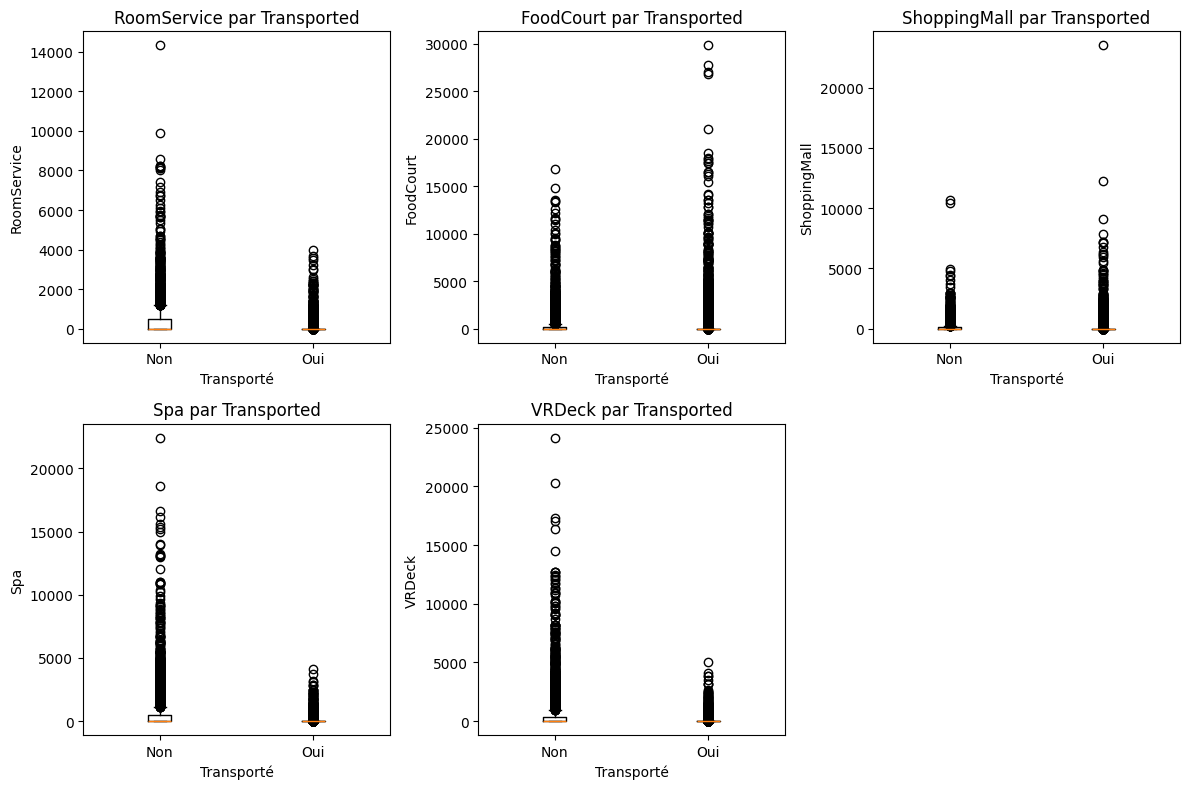

In [36]:
expense_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize=(12, 8))
for i, col in enumerate(expense_cols, 1):
    plt.subplot(2, 3, i)
    # Séparer les données par Transported, en ignorant les NaN
    data = [df[df['Transported'] == False][col].dropna(), 
            df[df['Transported'] == True][col].dropna()]
    plt.boxplot(data, labels=['Non', 'Oui'])
    plt.title(f'{col} par Transported')
    plt.xlabel('Transporté')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [37]:
# create copy of the dataframe for cleaning
# fill missing values with median for numeric columns and mode for categorical columns
df_clean= df.copy()


numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# split 'Cabin' into 'Deck', 'CabinNum', and 'Side'

df_clean[['Deck', 'CabinNum', 'Side']] = df_clean['Cabin'].str.split('/', expand=True)
df_clean['Deck'].fillna(df_clean['Deck'].mode()[0], inplace=True)
df_clean['CabinNum'].fillna(df_clean['CabinNum'].mode()[0], inplace=True)
df_clean['Side'].fillna(df_clean['Side'].mode()[0], inplace=True)
df_clean.drop('Cabin', axis=1, inplace=True)

# encode categorical variables

df_clean = pd.get_dummies(df_clean, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)

# normalize numeric columns
scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])


df_clean.drop(['Name', 'PassengerId'], axis=1, inplace=True)
df_clean.drop_duplicates(inplace=True)

print(df_clean.isnull().sum())
print(df_clean.shape)
print(df_clean.head())



CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Transported                  0
CabinNum                     0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
dtype: int64
(8668, 22)
   CryoSleep       Age    VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0      False  0.711945  False    -0.333105  -0.281027     -0.283579 -0.270626   
1      False -0.334037  False    -0.168073  -0.275387     -0.241771  0.217158   
2      False  2.036857   True    -0.268001   1.9599

/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2191845183.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/2191845183.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [39]:
X = df_clean.drop('Transported', axis=1)
y = df_clean['Transported'].astype(int)  # Convertir bool en 0/1 pour compatibilité

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestClassifier(
    n_estimators=100,  
    random_state=42
)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

In [40]:

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision sur l'ensemble de test : {accuracy:.4f}")
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, target_names=['Non transporté', 'Transporté']))


Précision sur l'ensemble de test : 0.8108

Rapport de classification :
                precision    recall  f1-score   support

Non transporté       0.80      0.84      0.82       892
    Transporté       0.82      0.78      0.80       842

      accuracy                           0.81      1734
     macro avg       0.81      0.81      0.81      1734
  weighted avg       0.81      0.81      0.81      1734




Scores de validation croisée : [0.75720877 0.76297578 0.80795848 0.813618   0.77495672]
Moyenne de la validation croisée : 0.7833 ± 0.0232


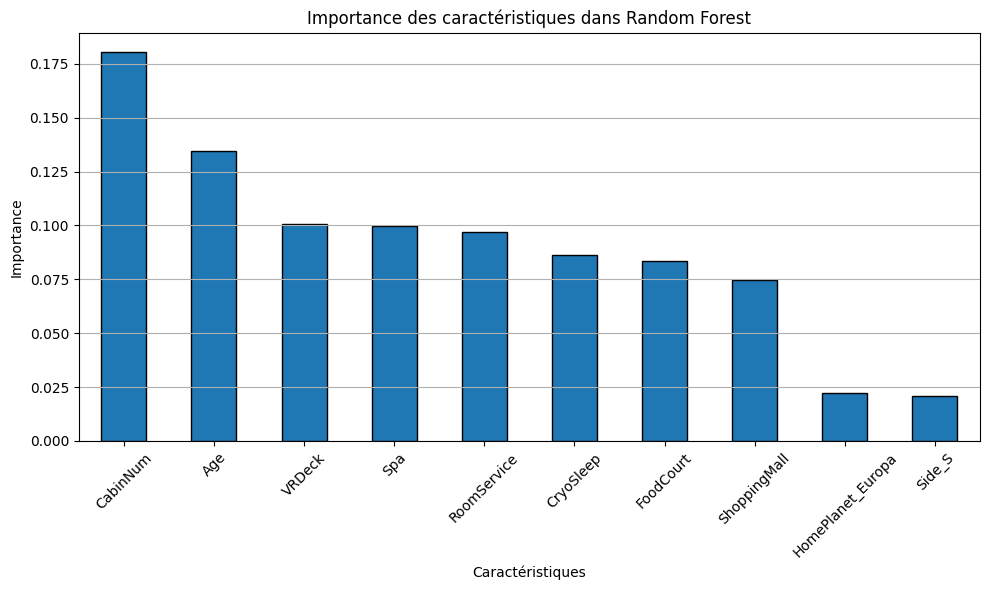

In [42]:

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nScores de validation croisée : {cv_scores}")
print(f"Moyenne de la validation croisée : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance[:10].plot(kind='bar', edgecolor='black')  
plt.title("Importance des caractéristiques dans Random Forest")
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

df_test = pd.read_csv('test.csv')


numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numeric_cols:
    df_test[col].fillna(df_test[col].median(), inplace=True)
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in categorical_cols:
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)
df_test[['Deck', 'CabinNum', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test['Deck'].fillna(df_test['Deck'].mode()[0], inplace=True)
df_test['CabinNum'].fillna(df_test['CabinNum'].mode()[0], inplace=True)
df_test['Side'].fillna(df_test['Side'].mode()[0], inplace=True)
df_test.drop(['Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'Destination', 'Deck', 'Side'], drop_first=True)


missing_cols = set(X.columns) - set(df_test.columns)
for col in missing_cols:
    df_test[col] = 0
df_test = df_test[X.columns]


test_pred = rf_model.predict(df_test)
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv')['PassengerId'],
    'Transported': test_pred.astype(bool)  
})
submission.to_csv('submission_rf.csv', index=False)
print("Fichier de soumission créé : submission_rf.csv")

Fichier de soumission créé : submission_rf.csv


/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/953468351.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test[col].fillna(df_test[col].median(), inplace=True)
/var/folders/8g/5r_8r4g979d_w41qn9g9mkhc0000gn/T/ipykernel_53443/953468351.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value